# Problem 1

### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. 

In [557]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

**Import the data**

In [558]:
df = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes', index_col=0)

In [559]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [560]:
# Shape of the dataset
df.shape

(1525, 9)

In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [562]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


**Check null values**

In [563]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

**Check for duplicate values**

In [564]:
df[df.duplicated()]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
68,Labour,35,4,4,5,2,3,2,male
627,Labour,39,3,4,4,2,5,2,male
871,Labour,38,2,4,2,2,4,3,male
984,Conservative,74,4,3,2,4,8,2,female
1155,Conservative,53,3,4,2,2,6,0,female
1237,Labour,36,3,3,2,2,6,2,female
1245,Labour,29,4,4,4,2,2,2,female
1439,Labour,40,4,3,4,2,2,2,male


In [565]:
print('Before: ', df.shape)

df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
print('After: ', df.shape)

Before:  (1525, 9)
After:  (1517, 9)


In [566]:
df.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1512,Conservative,67,5,3,2,4,11,3,male
1513,Conservative,73,2,2,4,4,8,2,male
1514,Labour,37,3,3,5,4,2,2,male
1515,Conservative,61,3,3,1,4,11,2,male
1516,Conservative,74,2,3,2,4,11,0,female


### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

#### Univariate Analysis

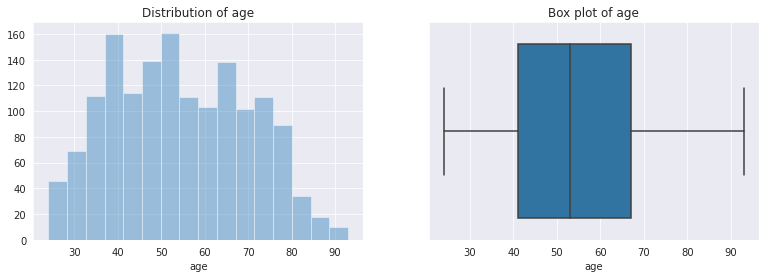

In [567]:
# Age
fig, axs = plt.subplots(ncols = 2, figsize=(13, 4))

sns.distplot(df['age'], kde=False, ax=axs[0]).set_title('Distribution of age')
sns.boxplot(df['age'], ax=axs[1], orient = 'v').set_title('Box plot of age');

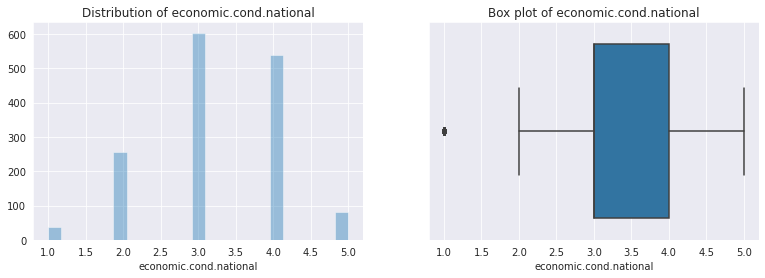

In [568]:
# economic.cond.national
fig, axs = plt.subplots(ncols = 2, figsize=(13, 4))

sns.distplot(df['economic.cond.national'], kde=False, ax=axs[0]).set_title('Distribution of economic.cond.national')
sns.boxplot(df['economic.cond.national'], ax=axs[1], orient = 'v').set_title('Box plot of economic.cond.national');

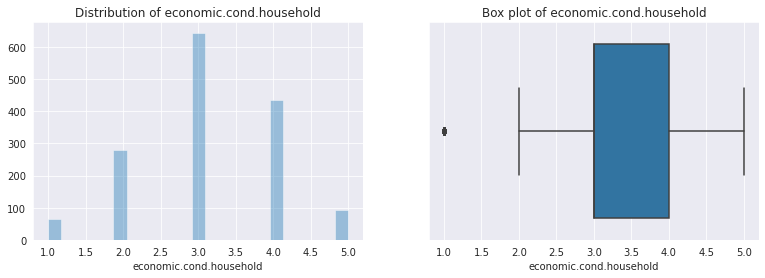

In [569]:
# economic.cond.household
fig, axs = plt.subplots(ncols = 2, figsize=(13, 4))

sns.distplot(df['economic.cond.household'], kde=False, ax=axs[0]).set_title('Distribution of economic.cond.household')
sns.boxplot(df['economic.cond.household'], ax=axs[1], orient = 'v').set_title('Box plot of economic.cond.household');

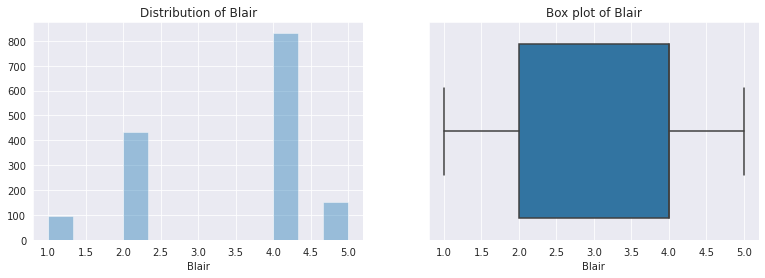

In [570]:
# Blair
fig, axs = plt.subplots(ncols = 2, figsize=(13, 4))

sns.distplot(df['Blair'], kde=False, ax=axs[0]).set_title('Distribution of Blair')
sns.boxplot(df['Blair'], ax=axs[1], orient = 'v').set_title('Box plot of Blair');

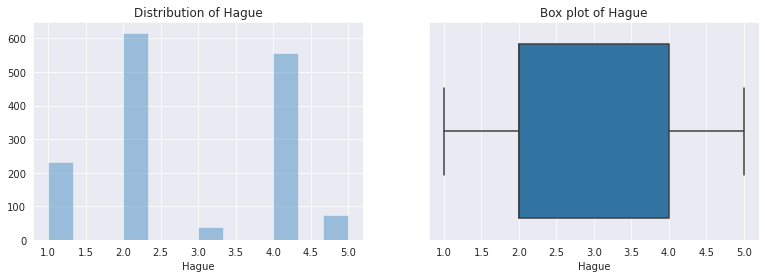

In [571]:
# Hague
fig, axs = plt.subplots(ncols = 2, figsize=(13, 4))

sns.distplot(df['Hague'], kde=False, ax=axs[0]).set_title('Distribution of Hague')
sns.boxplot(df['Hague'], ax=axs[1], orient = 'v').set_title('Box plot of Hague');

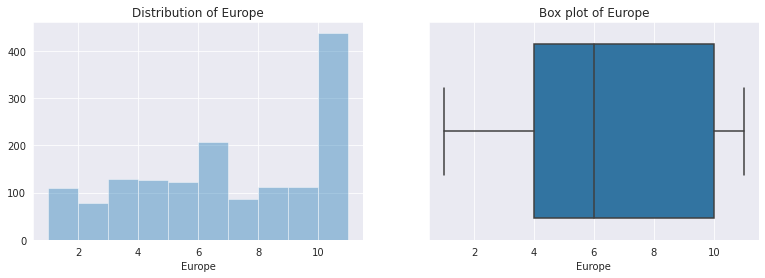

In [572]:
# Europe
sns.set_style("darkgrid")
fig, axs = plt.subplots(ncols = 2, figsize=(13, 4))

sns.distplot(df['Europe'], kde=False, ax=axs[0]).set_title('Distribution of Europe')
sns.boxplot(df['Europe'], ax=axs[1], orient = 'v').set_title('Box plot of Europe');

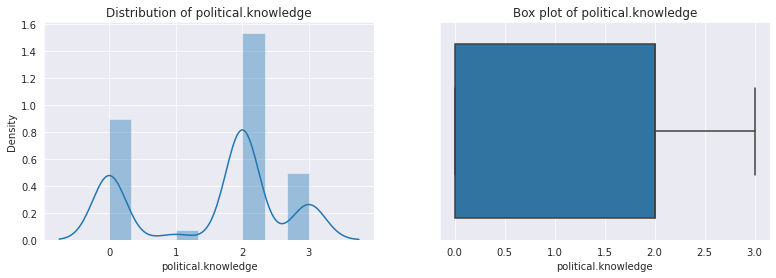

In [573]:
# political.knowledge
fig, axs = plt.subplots(ncols = 2, figsize=(13, 4))

sns.distplot(df['political.knowledge'], ax=axs[0]).set_title('Distribution of political.knowledge')
sns.boxplot(df['political.knowledge'], ax=axs[1], orient = 'v').set_title('Box plot of political.knowledge');

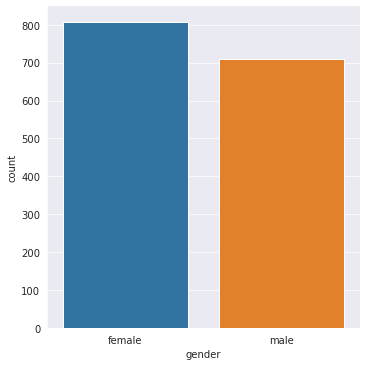

In [574]:
# gender
sns.catplot(x="gender", kind="count", data=df);

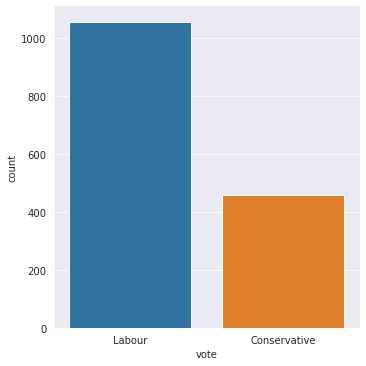

In [575]:
# vote
sns.catplot(x="vote", kind="count", data=df);

In [576]:
df.vote.value_counts()/1517

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

####  Bivariate Analysis 

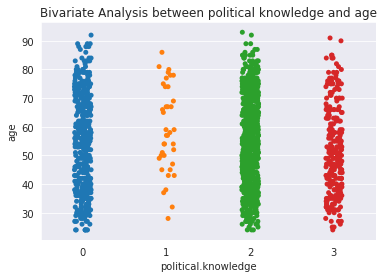

In [577]:
sns.stripplot(df['political.knowledge'], df['age'], jitter=True).set_title('Bivariate Analysis between political knowledge and age');


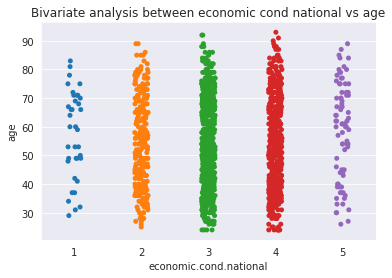

In [578]:
sns.stripplot(df['economic.cond.national'], df['age'], jitter=True).set_title("Bivariate analysis between economic cond national vs age");

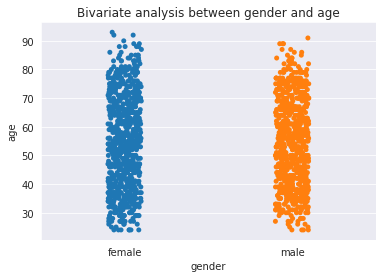

In [579]:
sns.stripplot(df['gender'], df['age'], jitter=True).set_title('Bivariate analysis between gender and age');

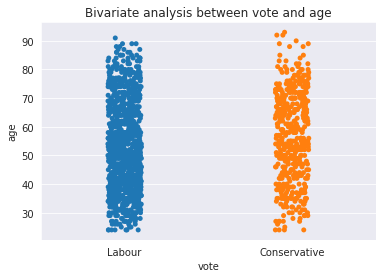

In [580]:
sns.stripplot(df['vote'], df['age'], jitter=True).set_title('Bivariate analysis between vote and age');

**Heat Map**

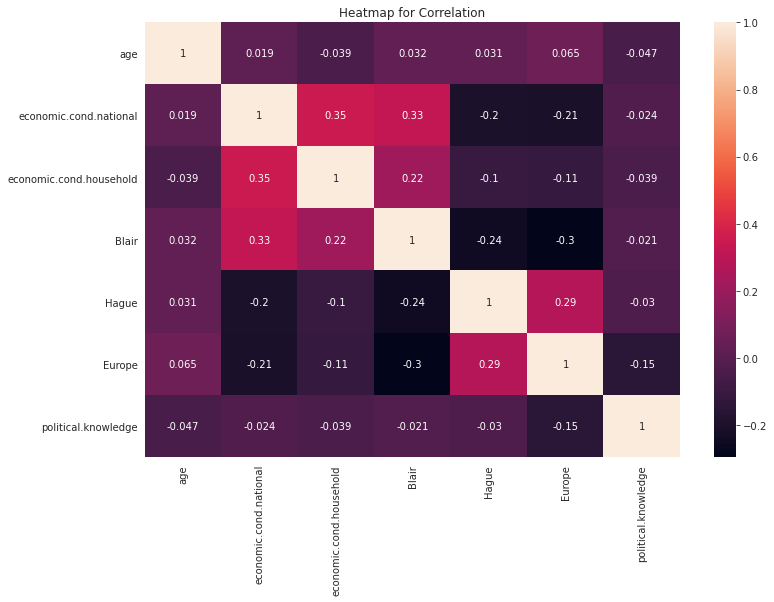

In [581]:
plt.figure(figsize=(12, 8))

df_corr = df.corr()
sns.heatmap(df_corr, annot = True).set_title('Heatmap for Correlation');

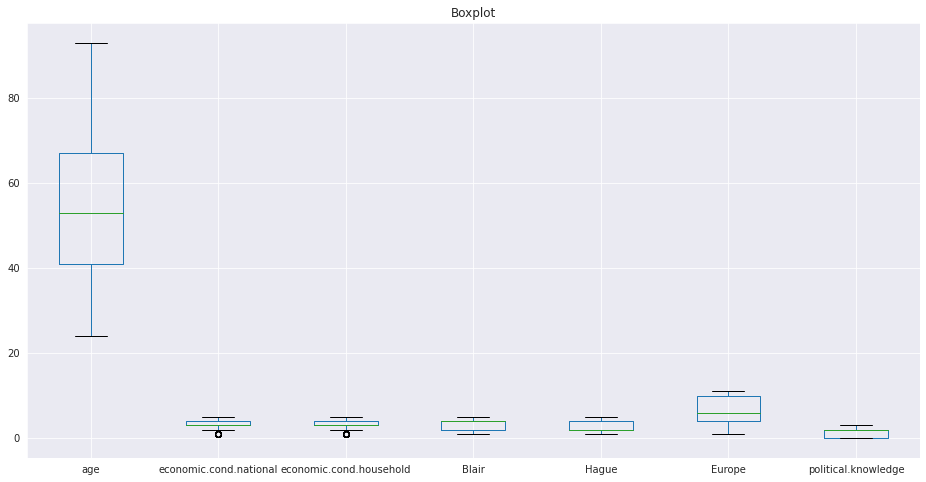

In [582]:
fig, axs = plt.subplots(figsize=(16, 8))
df.boxplot()
plt.title('Boxplot');

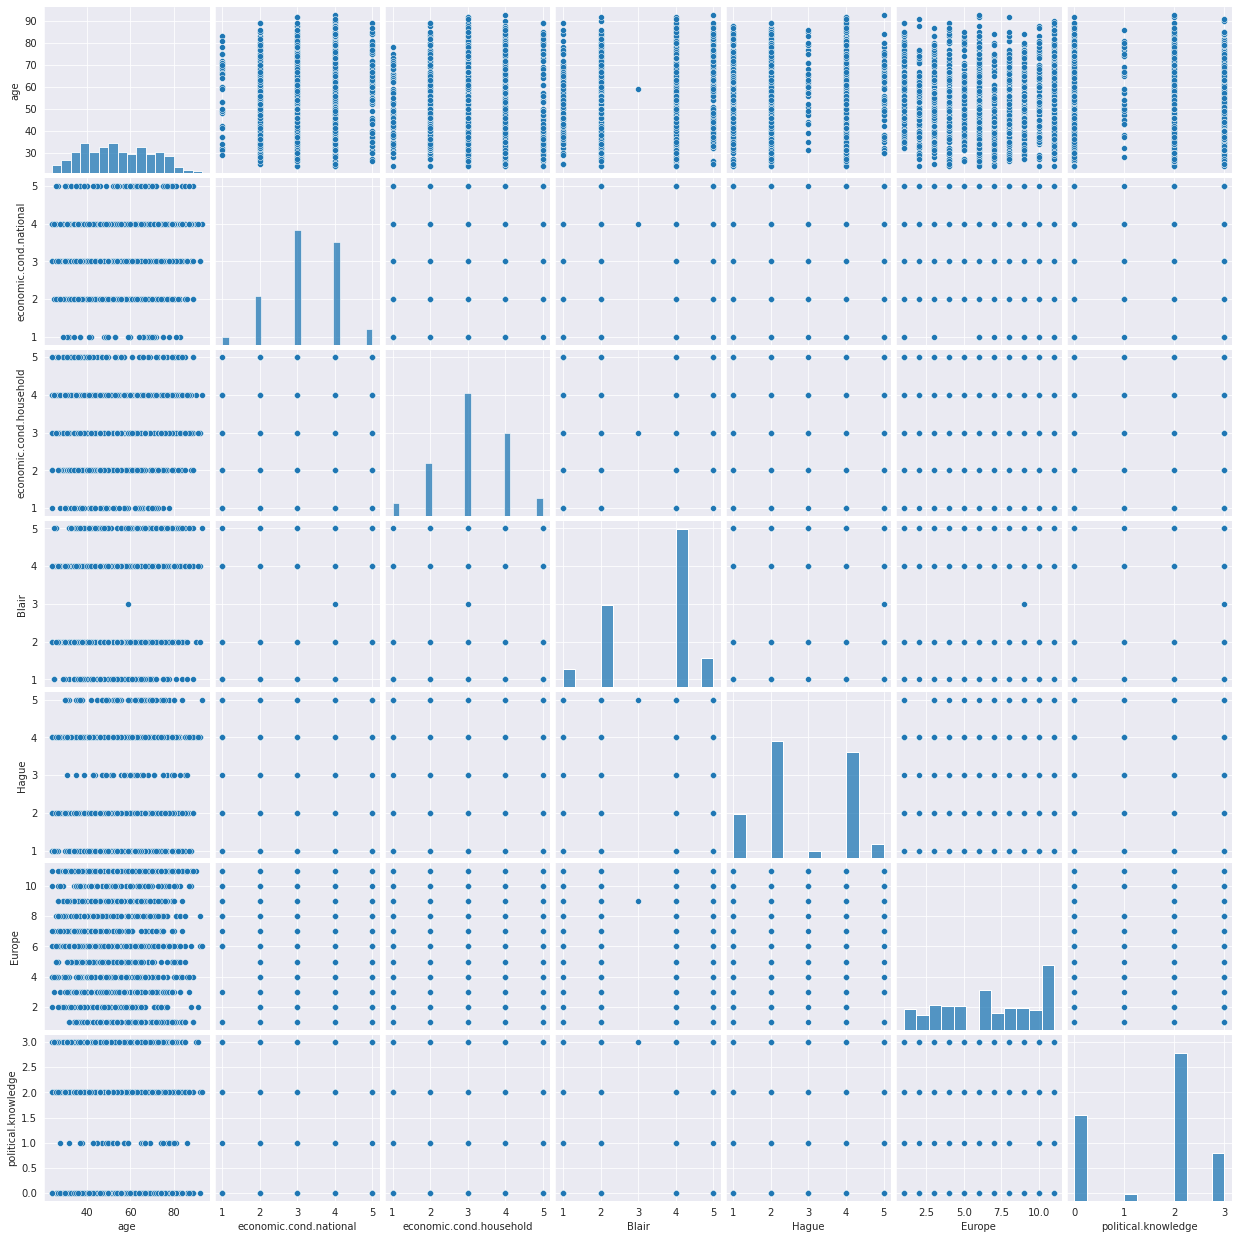

In [583]:
# Pair plot
sns.pairplot(df);

### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [584]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [585]:
# Label data
cleanup_nums = {"vote":     {"Labour": 0, "Conservative": 1},
                "gender":     {"female":0 , "male": 1}}
df = df.replace(cleanup_nums)

In [586]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,0
1,0,36,4,4,4,4,5,2,1
2,0,35,4,4,5,2,3,2,1
3,0,24,4,2,2,1,4,0,0
4,0,41,2,2,1,1,6,2,1


In [587]:
# Split data to X and y
X = df.drop('vote', axis=1)
y = df['vote']

In [588]:
y.value_counts()

0    1057
1     460
Name: vote, dtype: int64

In [589]:
# from collections import Counter
# from imblearn.over_sampling import SMOTE 

# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)
# y.value_counts()

In [590]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [591]:
# Scale data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 1.4 Apply Logistic Regression 

In [592]:
def confusion_mat(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["False","True"]],
                         columns = [i for i in ["False","True"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True,fmt='g')
    plt.xlabel("Actual")
    plt.ylabel("Predicted");
    
def roc_plot(model_name, model, X_train, y_train, X_test, y_test):
    ns_probs = [0 for _ in range(len(y_test))]
    mod_probs1 = model.predict_proba(X_train)
    mod_probs = model.predict_proba(X_test)
    
    # keep probabilities for the positive outcome only
    mod_probs1 = mod_probs1[:, 1]
    mod_probs = mod_probs[:, 1]
    
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    mod_auc1 = roc_auc_score(y_train, mod_probs1)
    mod_auc = roc_auc_score(y_test, mod_probs)
    
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print(model_name,'train: ROC AUC=%.3f' % (mod_auc1))
    print(model_name,'test: ROC AUC=%.3f' % (mod_auc))
    
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    mod_fpr1, mod_tpr1, _ = roc_curve(y_train, mod_probs1)
    mod_fpr, mod_tpr, _ = roc_curve(y_test, mod_probs)
    
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(mod_fpr1, mod_tpr1, marker='.', label=model_name + ' train')
    plt.plot(mod_fpr, mod_tpr, marker='.', label=model_name + ' test')
    
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()


In [593]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
print('Score for training set: ', log_reg.score(X_train,y_train))
print('Score for test set: ', log_reg.score(X_test , y_test))

Score for training set:  0.8312912346842601
Score for test set:  0.8355263157894737


              precision    recall  f1-score   support

           0       0.87      0.88      0.88       303
           1       0.76      0.74      0.75       153

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



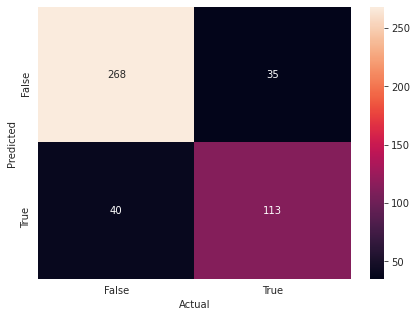

In [594]:
log_reg_pred = log_reg.predict(X_test)
print(classification_report(y_test, log_reg_pred))

# Confusion matrix
confusion_mat(y_test, log_reg_pred)

No Skill: ROC AUC=0.500
Logistic Regression train: ROC AUC=0.890
Logistic Regression test: ROC AUC=0.883


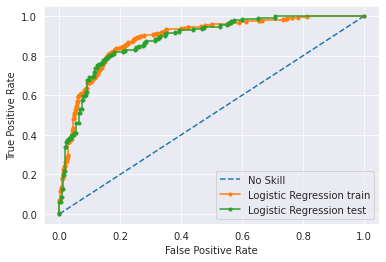

In [595]:
roc_plot("Logistic Regression", log_reg, X_train, y_train, X_test, y_test)

In [596]:
# features coef 
print('Coefficients of Logistic Regression\n')
for i in range(len(X.columns)):
    print(round(log_reg.coef_[0][i], 2), ' ', X.columns[i],)
    
print('\nIntercept: ',log_reg.intercept_[0])

Coefficients of Logistic Regression

0.23   age
-0.54   economic.cond.national
-0.06   economic.cond.household
-0.7   Blair
1.01   Hague
0.68   Europe
0.34   political.knowledge
-0.1   gender

Intercept:  -1.450169249163272


### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.


### KNN

In [597]:
k_nn = KNeighborsClassifier(n_neighbors=11, weights = 'distance')
k_nn.fit(X_train, y_train)

print('Score for training set: ', k_nn.score(X_train,y_train))
print('Score for test set: ', k_nn.score(X_test , y_test))

Score for training set:  1.0
Score for test set:  0.8289473684210527


              precision    recall  f1-score   support

           0       0.85      0.90      0.88       303
           1       0.78      0.68      0.73       153

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



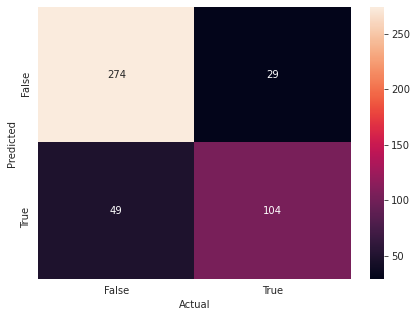

In [598]:
k_nn_pred = k_nn.predict(X_test)
print(classification_report(y_test, k_nn_pred))

# Confusion matrix
confusion_mat(y_test, k_nn_pred)

No Skill: ROC AUC=0.500
KNN train: ROC AUC=1.000
KNN test: ROC AUC=0.887


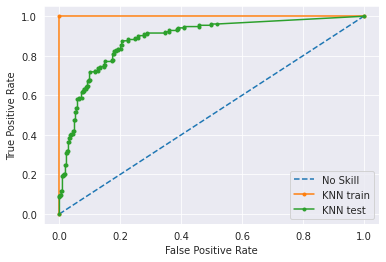

In [599]:
roc_plot('KNN', k_nn, X_train, y_train, X_test, y_test)

### Naïve Bayes Model

In [600]:
nbayes = GaussianNB()

nbayes.fit(X_train, y_train.ravel())
print('Score for training set: ', nbayes.score(X_train,y_train))
print('Score for test set: ', nbayes.score(X_test , y_test))

Score for training set:  0.8350612629594723
Score for test set:  0.8223684210526315


              precision    recall  f1-score   support

           0       0.87      0.87      0.87       303
           1       0.74      0.73      0.73       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



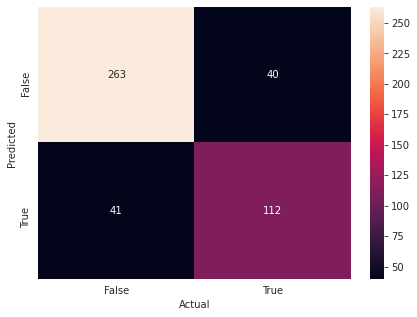

In [601]:
nbayes_pred = nbayes.predict(X_test)
print(classification_report(y_test, nbayes_pred))

# Confusion matrix
confusion_mat(y_test, nbayes_pred)

No Skill: ROC AUC=0.500
Naive Bayes train: ROC AUC=0.888
Naive Bayes test: ROC AUC=0.876


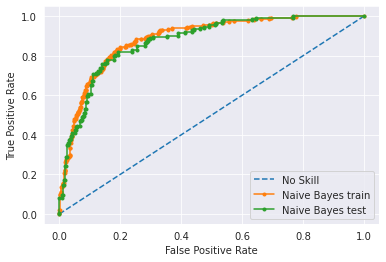

In [602]:
roc_plot('Naive Bayes', nbayes, X_train, y_train, X_test, y_test)

### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting

### Random Forest

In [603]:
rf = RandomForestClassifier(random_state=1)

rf.fit(X_train, y_train)
print('Score for training set: ', rf.score(X_train, y_train))
print('Score for test set: ', rf.score(X_test, y_test))

Score for training set:  1.0
Score for test set:  0.8267543859649122


              precision    recall  f1-score   support

           0       0.84      0.91      0.87       303
           1       0.78      0.67      0.72       153

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456



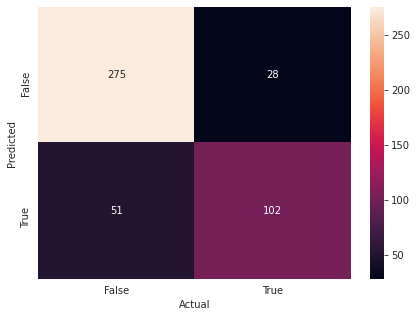

In [604]:
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))

# Confusion matrix
confusion_mat(y_test, rf_pred)

No Skill: ROC AUC=0.500
Random Forest train: ROC AUC=1.000
Random Forest test: ROC AUC=0.895


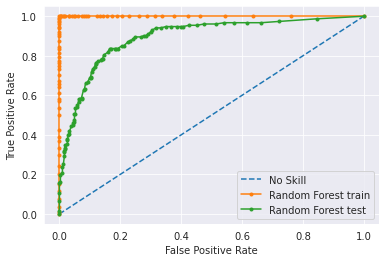

In [605]:
roc_plot('Random Forest', rf, X_train, y_train, X_test, y_test)

### Bagging

In [606]:
bagging = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=150,
                           random_state=1)

bagging.fit(X_train, y_train)
print('Score for training set: ', bagging.score(X_train, y_train))
print('Score for test set: ', bagging.score(X_test, y_test))

Score for training set:  0.9679547596606974
Score for test set:  0.8289473684210527


              precision    recall  f1-score   support

           0       0.85      0.90      0.88       303
           1       0.78      0.68      0.73       153

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



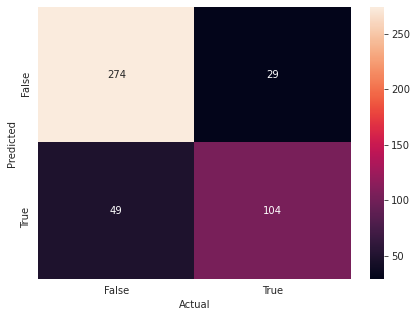

In [607]:
bagging_pred = bagging.predict(X_test)
print(classification_report(y_test, bagging_pred))

# Confusion matrix
confusion_mat(y_test, bagging_pred)

No Skill: ROC AUC=0.500
Bagging Classifier train: ROC AUC=0.997
Bagging Classifier test: ROC AUC=0.897


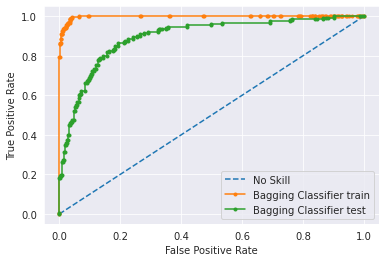

In [608]:
roc_plot('Bagging Classifier', bagging, X_train, y_train, X_test, y_test)

### AdaBoost Model

In [609]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=1)
adaboost.fit(X_train, y_train)
print('Score for training set: ', adaboost.score(X_train, y_train))
print('Score for test set: ', adaboost.score(X_test, y_test))

Score for training set:  0.8501413760603205
Score for test set:  0.8135964912280702


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       303
           1       0.75      0.67      0.71       153

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



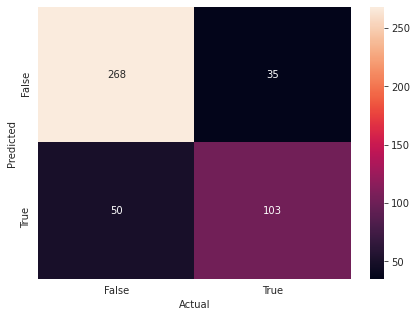

In [610]:
adaboost_pred = adaboost.predict(X_test)
print(classification_report(y_test, adaboost_pred))

# Confusion matrix
confusion_mat(y_test, adaboost_pred)

No Skill: ROC AUC=0.500
AdaBoost Classifier train: ROC AUC=0.915
AdaBoost Classifier test: ROC AUC=0.877


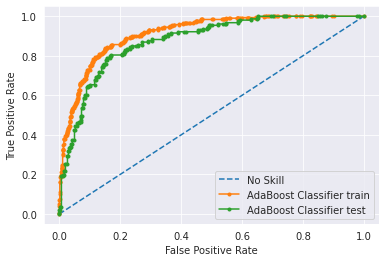

In [611]:
roc_plot('AdaBoost Classifier', adaboost, X_train, y_train, X_test, y_test)

### Gradient Boosting

In [612]:
gboost = GradientBoostingClassifier(random_state=1)
gboost.fit(X_train, y_train)
print('Score for training set: ', gboost.score(X_train, y_train))
print('Score for test set: ', gboost.score(X_test, y_test))

Score for training set:  0.8925541941564562
Score for test set:  0.8333333333333334


              precision    recall  f1-score   support

           0       0.85      0.91      0.88       303
           1       0.79      0.68      0.73       153

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



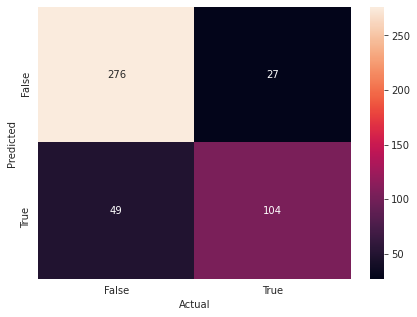

In [613]:
gboost_pred = gboost.predict(X_test)
print(classification_report(y_test, gboost_pred))

# Confusion matrix
confusion_mat(y_test, gboost_pred)

No Skill: ROC AUC=0.500
Gradient Boosting Classifier train: ROC AUC=0.951
Gradient Boosting Classifier test: ROC AUC=0.899


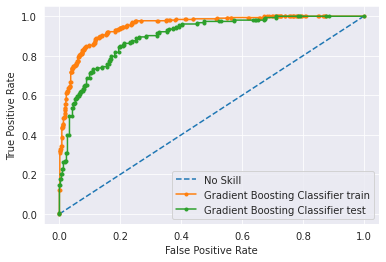

In [614]:
roc_plot('Gradient Boosting Classifier', gboost, X_train, y_train, X_test, y_test)

### Model Tuning 

### Grid Search

In [615]:
param_grid = {
    'max_depth': [7, 8, 9, 10, 11, 12],
    'max_features': [3, 5],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [50, 100],
    'n_estimators':[100, 125, 150]
}
rfcl = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfcl, param_grid=param_grid, cv=5)

In [616]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10, 11, 12],
                         'max_features': [3, 5],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 125, 150]})

In [617]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 125}


In [618]:
rfcl = RandomForestClassifier(max_depth=9, max_features=8, min_samples_leaf=5, min_samples_split=50, n_estimators=100)
rfcl.fit(X_train, y_train)
print('Score for training set: ', rfcl.score(X_train, y_train))
print('Score for test set: ', rfcl.score(X_test, y_test))

Score for training set:  0.8539114043355325
Score for test set:  0.8114035087719298


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       303
           1       0.74      0.68      0.71       153

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.81      0.81      0.81       456



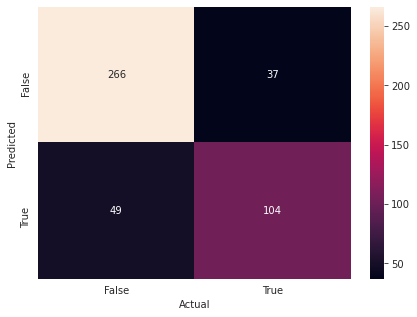

In [619]:
rfcl_pred = rfcl.predict(X_test)
print(classification_report(y_test, rfcl_pred))

# Confusion matrix
confusion_mat(y_test, rfcl_pred)

No Skill: ROC AUC=0.500
Random Forest with params train: ROC AUC=0.916
Random Forest with params test: ROC AUC=0.886


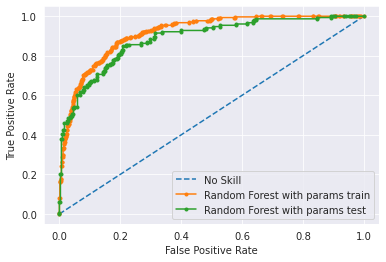

In [620]:
roc_plot('Random Forest with params', rfcl, X_train, y_train, X_test, y_test)

### Model Comparison

In [621]:
df_models = pd.DataFrame()
df_models['Model'] = ['Logistic Regression', 'KNN', 'Naïve Bayes', 'Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boosting', 'Random Forest grid params']
df_models['Train Score'] = [log_reg.score(X_train, y_train), k_nn.score(X_train, y_train), nbayes.score(X_train, y_train),
                           rf.score(X_train, y_train), bagging.score(X_train, y_train), adaboost.score(X_train, y_train),
                           gboost.score(X_train, y_train), rfcl.score(X_train, y_train)]
df_models['Test Score'] = [log_reg.score(X_test, y_test), k_nn.score(X_test, y_test), nbayes.score(X_test, y_test),
                          rf.score(X_test, y_test), bagging.score(X_test, y_test), adaboost.score(X_test, y_test),
                          gboost.score(X_test, y_test), rfcl.score(X_test, y_test)]

df_models = df_models.sort_values('Test Score', ascending=False)

In [622]:
df_models

,Model,Train Score,Test Score
0,Logistic Regression,0.831291,0.835526
6,Gradient Boosting,0.892554,0.833333
1,KNN,1.000000,0.828947
4,Bagging,0.967955,0.828947
3,Random Forest,1.000000,0.826754
2,Naïve Bayes,0.835061,0.822368
5,AdaBoost,0.850141,0.813596
7,Random Forest grid params,0.853911,0.811404


### Model Comparison with SMOTE

To get these results, please uncomment SMOTE code which is situated before spliting to train/test sets

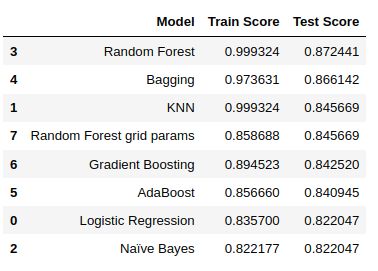

# Problem 2

### 2.1 Find the number of characters, words, and sentences for the mentioned documents

In [740]:
import nltk
import random
import string
from nltk.corpus import inaugural, stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [730]:
nltk.download('inaugural')
inaugural.fileids()
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to /home/nastia/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [731]:
def doc_info(text, name):
    # count sentances
    sent = 0
    for x in text.split():
        if x.endswith('.') and x not in ['Mr.', 'Mrs.']:
            sent +=1    
    
    print(f'\n------------{name}------------')
    print(f'Number of characters : {len(text)}')
    print(f'Number of words : {len(text.split())}')
    print(f'Number of sentences : {sent}')

doc_info(Roosevelt, 'Roosevelt')
doc_info(Kennedy, 'Kennedy')    
doc_info(Nixon, 'Nixon')


------------Roosevelt------------
Number of characters : 7571
Number of words : 1360
Number of sentences : 67

------------Kennedy------------
Number of characters : 7618
Number of words : 1390
Number of sentences : 50

------------Nixon------------
Number of characters : 9991
Number of words : 1819
Number of sentences : 64


### 2.2 Remove all the stopwords from all three speeches.

In [823]:
def remove_stopwords_nopunc(text):
    stop_words = set(stopwords.words('english')+list(string.punctuation)+['==', '--'])
    word_tokens = word_tokenize(text)
    filtered_sentance = [w for w in word_tokens if not w.lower() in stop_words]
    return filtered_sentance

In [887]:
roosevelt_words = remove_stopwords_nopunc(Roosevelt)
kennedy_words = remove_stopwords_nopunc(Kennedy)
nixon_words = remove_stopwords_nopunc(Nixon)

print('Roosevelt')
print('before removing stopwords : 1360')
print(f'after  : {len(roosevelt_words)}')

print('\nKenedy')
print('before removing stopwords : 1390')
print(f'after  : {len(kennedy_words)}')

print('\nNixon')
print('before removing stopwords : 1819')
print(f'after  : {len(nixon_words)}')


Roosevelt
before removing stopwords : 1360
after  : 632

Kenedy
before removing stopwords : 1390
after  : 696

Nixon
before removing stopwords : 1819
after  : 848


### 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [826]:
def top_3_words(text):
    words_freq = {}
    for word in text:
        word=word.lower()

        if word in words_freq:
            words_freq[word] += 1
        else:
            words_freq[word] = 1
    sort_words_freq = sorted(words_freq.items(), key=lambda x: x[1], reverse=True)
    return sort_words_freq[:3]

In [838]:
print('--------------TOP 3 WORDS--------------')
print('\nRoosevelt')
print(top_3_words(roosevelt_words))

print('\nKennedy')
print(top_3_words(kennedy_words))

print('\nNixon')
print(top_3_words(nixon_words))

--------------TOP 3 WORDS--------------

Roosevelt
[('nation', 12), ('know', 10), ('spirit', 9)]

Kennedy
[('let', 16), ('us', 12), ('world', 8)]

Nixon
[('us', 26), ('let', 22), ('america', 21)]


### 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) –

In [873]:
from wordcloud import WordCloud
def plot_word_cloud(president_words):
    text = " ".join(president_words)
    word_cloud = WordCloud(width=800, height=400, background_color = 'black').generate(text)
    # Display the generated Word Cloud
    plt.figure(figsize=(30,20))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()   


Roosevelt


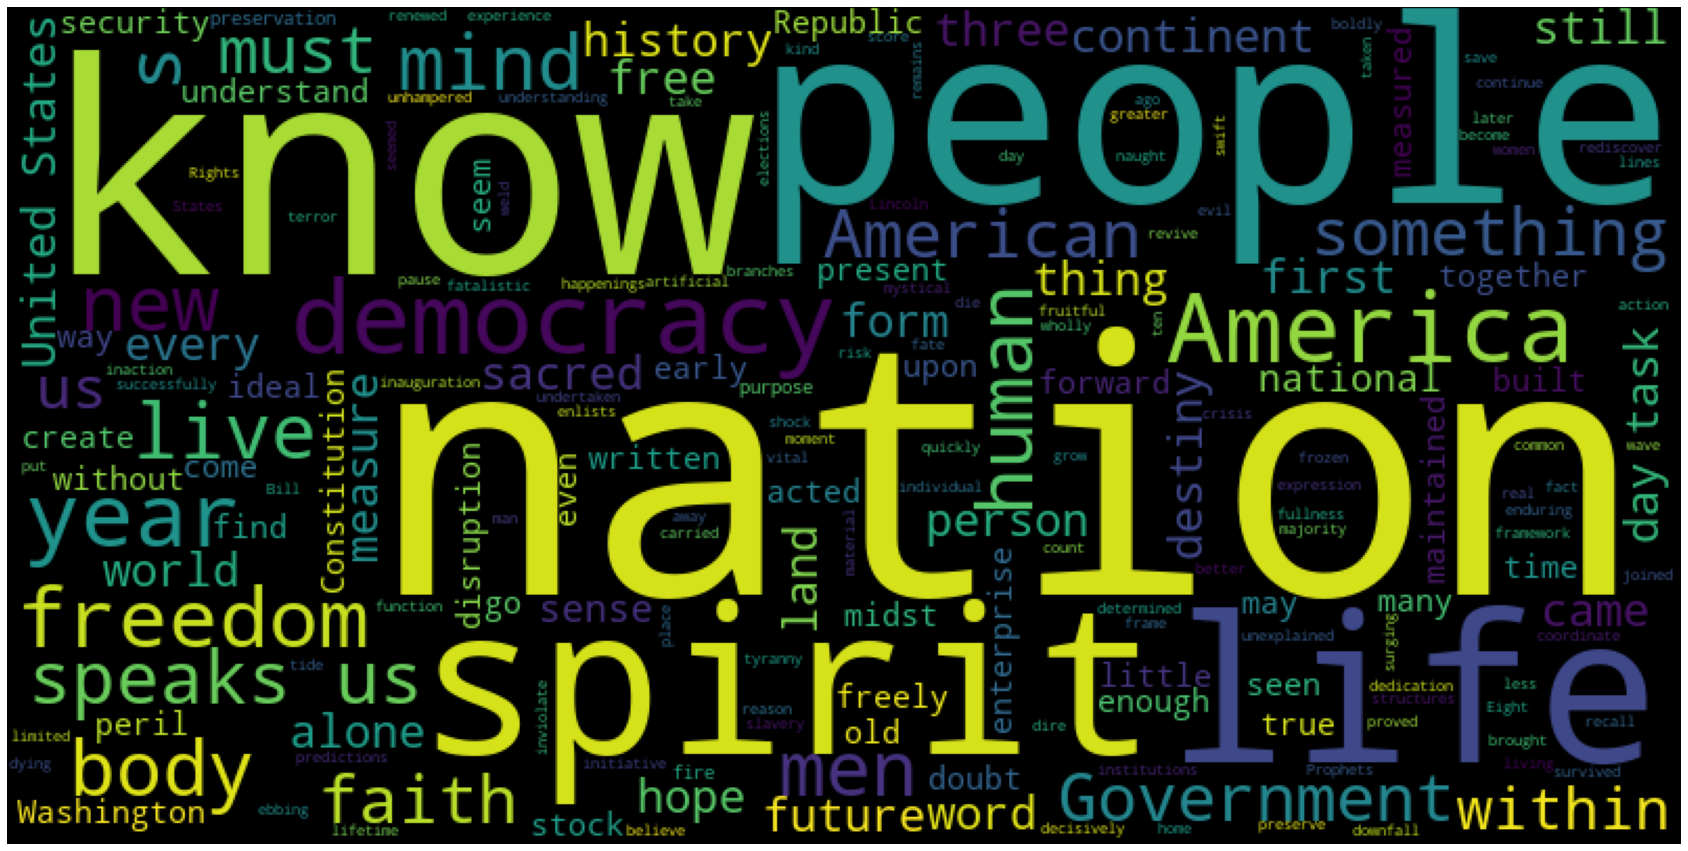


Kennedy


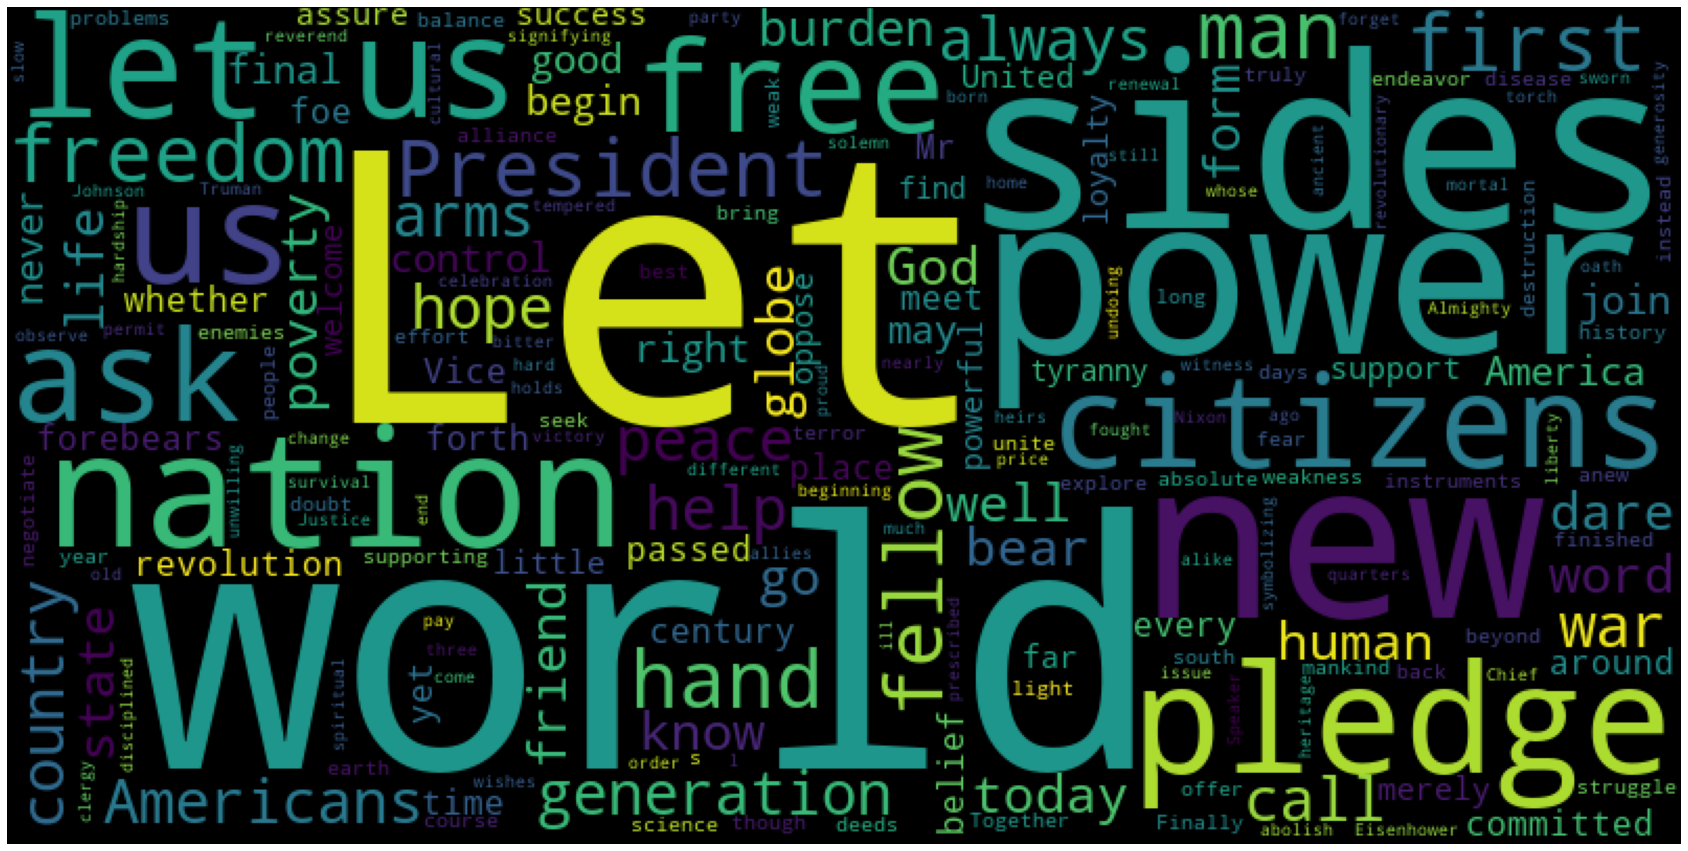


Nixon


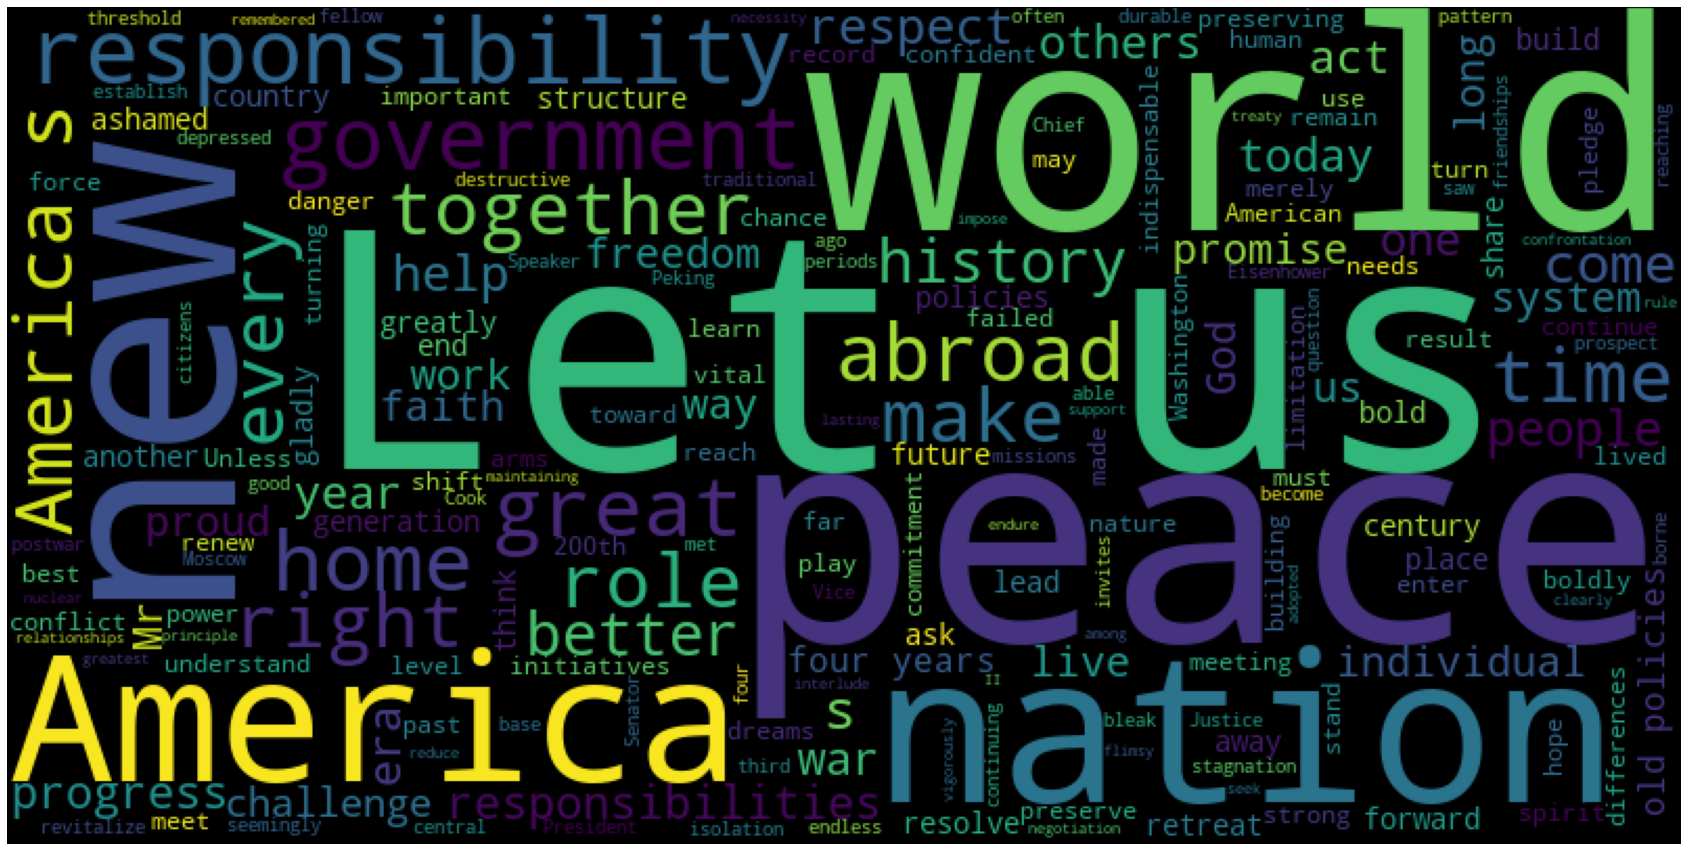

In [874]:
print('\nRoosevelt')
plot_word_cloud(roosevelt_words)

print('\nKennedy')
plot_word_cloud(kennedy_words)

print('\nNixon')
plot_word_cloud(nixon_words)